<a href="https://colab.research.google.com/github/krisster/Raif_Project/blob/main/Raif_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the problem of income predictions
*According to characteristics decide if an agent has an income higher or lower than 50 thousands*
* Downloading dataset 
* Analysis of missing values and wrong data

In [323]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from google.colab import drive


import warnings
warnings.filterwarnings("ignore")

## Download data



In [ ]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

In [ ]:
!sudo apt update && sudo apt install --yes python3 python3-pip && \
!pip3 install psycopg2-binary

In [ ]:
import psycopg2

conn = psycopg2.connect("""
    host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
    port=6432
    sslmode=verify-full
    dbname=db_clients
    user=mlhs_student
    password=mlhs_student
    target_session_attrs=read-write
""")

In [ ]:
query = "SELECT * from public.adult_income"
df = pd.read_sql_query(query, conn)
conn.close()

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df.shape 

(9615, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              8961 non-null   float64
 1   workclass        9615 non-null   object 
 2   fnlwgt           9615 non-null   int64  
 3   education        9615 non-null   object 
 4   educational-num  9615 non-null   int64  
 5   marital-status   9615 non-null   object 
 6   occupation       9615 non-null   object 
 7   relationship     9615 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   8543 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


### Data collection

In [ ]:
df.to_csv("income_clients.csv", index=False)

## Data analysis

In [1]:
drive.mount('/content/drive')

Mounted at /content/drive


In [282]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income_clients.csv")

### Quality of data

In [140]:
df.isna().sum()

age                 654
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  1
gender                1
capital-gain          1
capital-loss          1
hours-per-week     1072
native-country        1
income                1
dtype: int64

In [286]:
# delete the row, where income is nan
df = df.drop(df[df["income"].isna()].index)

In [400]:
result = df_change[df_change.applymap(lambda x: '?' in str(x)).any(axis=1)] 
result

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,cluster


There are missing values in "age", "hours-per-week" and also in "workclass", "native-country" and "occupation". I decided to use different methods to fill nans. For the first case, with age, I just use median. Second thing, I decide to fill "workclass" and "occupation" using random forest. Third case "hours-per-week" will be filled according information from missed data

<Axes: >

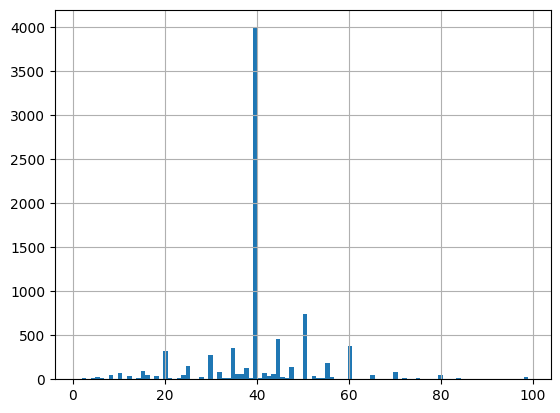

In [6]:
df["hours-per-week"].hist(bins=100)

In [287]:
median_age = df.age.median()
df["age"] = df["age"].fillna(median_age)

We can see that missong values in the variable "hours-per-week" is aboout 10%. Thus we have to fill this values with something. Looking at this histogram plot we can see that the most frequent value is 40 hours a day. So, put it instead of nan

However, there are cases, where values are hidden ("?"). Try to use a RandomForest method to fill missing values

### RandomForestClassifier

In [288]:
cat_features = ["education", "marital-status", "relationship", 
                "race", "gender", "income"] # "native-country", "workclass", "occupation"     

In [289]:
numerical_feat = ["age", "fnlwgt", "educational-num", 
                  "capital-gain", "capital-loss"]

In [290]:
df_change = pd.get_dummies(df, columns = cat_features)

In [291]:
mis_values = df_change[(df_change["occupation"] == "?") | (df_change["workclass"] == "?") | (df_change["native-country"] == "?")]

In [292]:
df_full = df_change[(df_change["occupation"] != "?") & (df_change["workclass"] != "?") & (df_change["native-country"] != "?")]
# df_full = df_full.dropna()

In [293]:
# drop hours-per-week because there are lots of nans, 
# but fill it according information from other columns
X = df_full.drop(columns = ["workclass", "occupation", "native-country", "hours-per-week"])
y = df_full["native-country"]

In [294]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [295]:
X_test = mis_values.drop(columns = ["workclass", "occupation", "native-country", "hours-per-week"])

In [296]:
mis_values["native-country"] = clf.predict(X_test)

In [297]:
mis_values["native-country"].value_counts()

United-States         703
Mexico                 10
Philippines             9
India                   8
Columbia                2
China                   2
Guatemala               1
Peru                    1
Dominican-Republic      1
Name: native-country, dtype: int64

In [298]:
df_new = pd.concat([df_full, mis_values])

Do the same things again for "occupation"

In [299]:
cat_features = ["native-country"]

In [300]:
df_change = pd.get_dummies(df_new, columns = cat_features)

In [301]:
mis_values = df_change[(df_change["occupation"] == "?") | (df_change["workclass"] == "?")]
df_full = df_change[(df_change["occupation"] != "?") & (df_change["workclass"] != "?")]

In [302]:
X = df_full.drop(columns = ["workclass", "occupation", "hours-per-week", "hours-per-week"])
y = df_full["workclass"]

In [303]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [304]:
X_test = mis_values.drop(columns = ["workclass", "occupation", "hours-per-week", "hours-per-week"])

In [305]:
mis_values["workclass"] = clf.predict(X_test)

In [306]:
mis_values["workclass"].value_counts()

Private             513
Self-emp-not-inc     44
Local-gov            16
Self-emp-inc          5
State-gov             5
Federal-gov           2
Name: workclass, dtype: int64

In [307]:
df_new = pd.concat([df_full, mis_values])

And for "work-class"

In [308]:
cat_features = ["workclass"]

In [309]:
df_change = pd.get_dummies(df_new, columns = cat_features)

In [310]:
mis_values = df_change[(df_change["occupation"] == "?")]
df_full = df_change[(df_change["occupation"] != "?")]

In [311]:
X = df_full.drop(columns = ["occupation", "hours-per-week", "hours-per-week"])
y = df_full["occupation"]

In [312]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [313]:
X_test = mis_values.drop(columns = ["occupation", "hours-per-week"])

In [314]:
mis_values["occupation"] = clf.predict(X_test)

In [315]:
mis_values["occupation"].value_counts()

Other-service        128
Adm-clerical          94
Sales                 91
Craft-repair          57
Exec-managerial       47
Machine-op-inspct     36
Prof-specialty        32
Transport-moving      27
Handlers-cleaners     26
Farming-fishing       25
Tech-support          12
Priv-house-serv        6
Protective-serv        4
Name: occupation, dtype: int64

In [316]:
df_new = pd.concat([df_full, mis_values])

In [319]:
df_new.shape

(9614, 92)

The last feature is "hours-per-week". Let's try to apply clusterization

In [326]:
cat_features = ["occupation"]

In [331]:
df_change = pd.get_dummies(df_new, columns = cat_features)

In [385]:
# Scale our values, use MinMax as we have categirical features
mms = MinMaxScaler()
mms.fit(df_change.drop(columns="hours-per-week"))
df_transformed = mms.transform(df_change.drop(columns="hours-per-week"))

In [386]:
# Elbow method to find an optimal numer of clusters
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

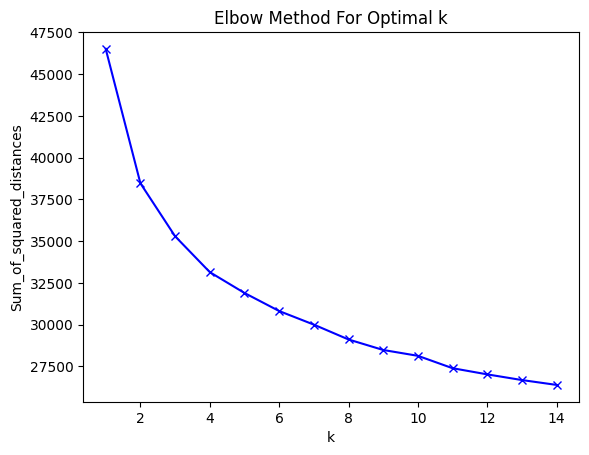

In [387]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This is an elbow method even if we don't have a peak here. I will choose number of clusters = 7, as we can see, that we have lower additional qualuty here

In [379]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df_transformed)

KMeans(n_clusters=7, random_state=0)

In [388]:
df_change['cluster'] = kmeans.predict(df_transformed)

In [395]:
df_change["hours-per-week"] = df_change.groupby("cluster")["hours-per-week"].apply(lambda x: x.fillna(x.median()))

In [399]:
df_change.isna().sum()

age                            0
fnlwgt                         0
educational-num                0
capital-gain                   0
capital-loss                   0
                              ..
occupation_Protective-serv     0
occupation_Sales               0
occupation_Tech-support        0
occupation_Transport-moving    0
cluster                        0
Length: 106, dtype: int64

### Wrong values

### Main characteristics

In [ ]:
# There is a class disbalance
df['income'].value_counts(normalize=True)

<=50K    0.763998
>50K     0.236002
Name: income, dtype: float64

In [401]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,9614.000000,9.614000e+03,9614.000000,9614.000000,9614.000000,8543.000000
mean,38.604327,1.882948e+05,10.080092,1121.998232,87.926669,40.475126
std,13.362983,1.051352e+05,2.562733,7890.578253,404.085647,12.340030
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.154652e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778450e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.374175e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


<Axes: >

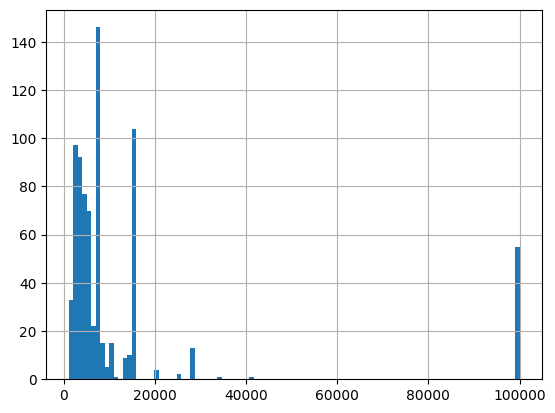

In [407]:
# We have some strange values for capital-gain - 99999
df[df["capital-gain"] > 1000]["capital-gain"].hist(bins=100)

In [ ]:
df[df["capital-gain"] == df["capital-gain"].max()]

All clients have income higher than 50K. So, they maybe do not want to say about additional gain. As this value seems strange, I decided just fill capital-gain by mean among people, who have income > 50K



In [ ]:
df.loc[df['name'] == 'Charlie', 'age'] = 40

In [417]:
mean = df_change[df_change["income_>50K"] == 1]["capital-gain"].mean()
df_change.loc[df_change["capital-gain"] == df_change["capital-gain"].max(), "capital-gain"] = mean

<Axes: >

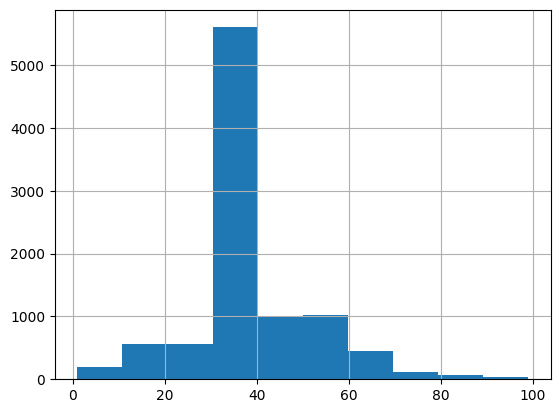

In [423]:
df_change["hours-per-week"].hist()

In [425]:
corr = df.corr()
corr.style.background_gradient()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.079232,0.002274,0.072331,0.049127,0.086708
fnlwgt,-0.079232,1.000000,-0.024398,-0.005989,-0.000409,-0.003148
educational-num,0.002274,-0.024398,1.000000,0.132639,0.083546,0.137757
capital-gain,0.072331,-0.005989,0.132639,1.000000,-0.030944,0.102024
capital-loss,0.049127,-0.000409,0.083546,-0.030944,1.000000,0.052580
hours-per-week,0.086708,-0.003148,0.137757,0.102024,0.052580,1.000000
